## KMeans, StandardScaler and ARI in sklearn

In [1]:
# sklearn imports
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# pandas and numpy imports
import numpy as np
import pandas as pd

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [2]:
# load iris dataset
iris = load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris['data'].shape)

(150, 4)


In [4]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


### Data Analysis

In [7]:
# create dataset df
iris_df = pd.DataFrame(data=iris['data'],
                       columns=iris['feature_names'])

iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df.shape

(150, 4)

In [9]:
iris_df.isna().sum().T

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Text(0.5, 0.98, 'Iris histogram')

<Figure size 640x480 with 0 Axes>

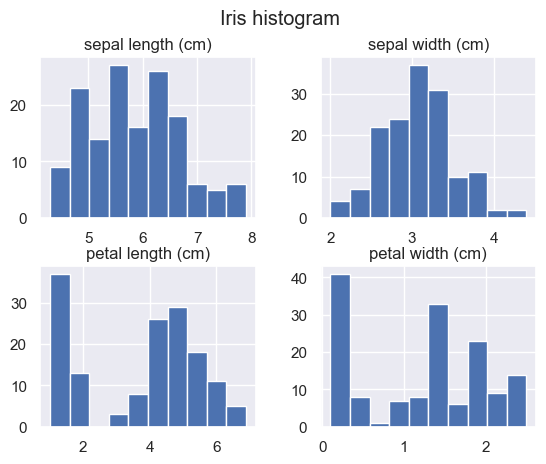

In [11]:
# plot figures
plt.figure()
iris_df.hist()
plt.suptitle('Iris histogram')

<Axes: >

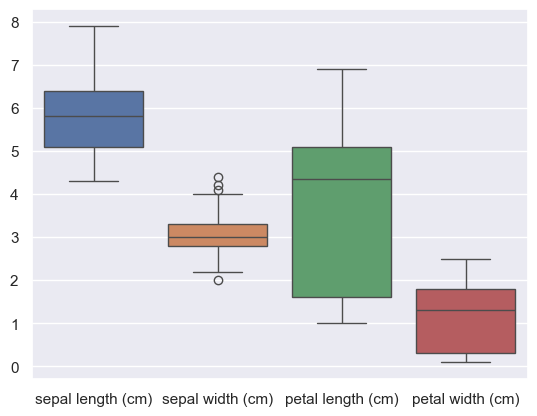

In [12]:
sns.boxplot(iris_df)

In [13]:
# Add label to the dataset
iris_df['label'] = [iris['target_names'][target] for target in iris['target']]

# drop the versicolor class
iris_df = iris_df[iris_df['label'] != 'versicolor']

# keep only petal length and petal width
iris_df = iris_df.filter(
    items=[
        'petal length (cm)',
        'petal width (cm)',
        'label'
    ]
)

In [14]:
iris_df.shape

(100, 3)

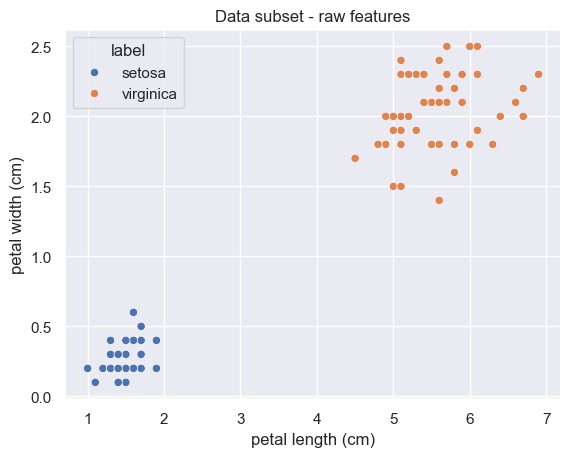

In [15]:
# scatterplot
sns.scatterplot(data=iris_df,
               x='petal length (cm)',
               y='petal width (cm)',
               hue='label'
               )
plt.title('Data subset - raw features')
plt.show()

## Cluster the dataset without data scaling

C:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

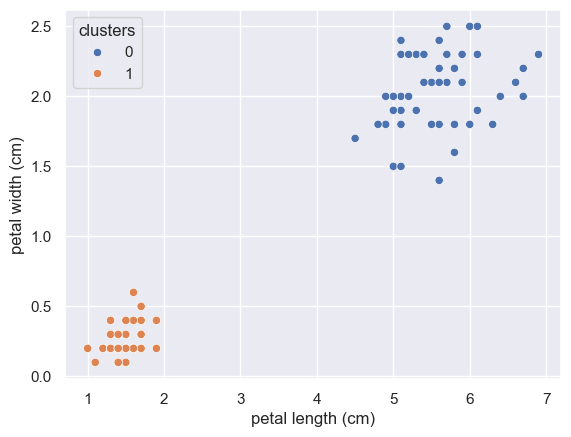

In [17]:
# Prepare K-means clustering input
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Run K-means clustering with k=2
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(cluster_data)

# Extract cluster id for each data
iris_df['clusters'] = kmeans.predict(cluster_data)

# plot clustering
sns.scatterplot(iris_df,
               x='petal length (cm)',
               y='petal width (cm)',
               hue='clusters')

In [22]:
# Label values
iris_df['label'].to_numpy()

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virg

In [23]:
# cluster values
iris_df['clusters'].to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
adjusted_rand_score(iris_df['label'].to_numpy(), iris_df['clusters'].to_numpy())

1.0